In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
dataset= pd.read_csv("Social_Network_Ads.csv")
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


plotting a graph if the data is linearly separable or not

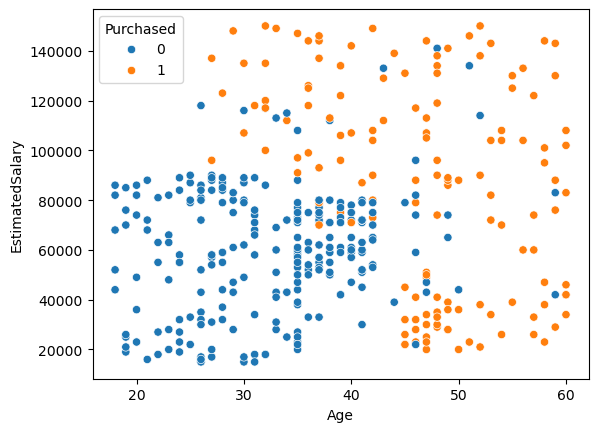

In [3]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset,hue="Purchased")
plt.show()

In [4]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
x =dataset.iloc[:,:-1]
y =dataset["Purchased"]

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc=StandardScaler()
sc.fit(x)

StandardScaler()

In [8]:
x=pd.DataFrame(sc.transform(x),columns=x.columns)
               

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [11]:
x_train.shape

(320, 2)

In [12]:
from sklearn.tree import DecisionTreeClassifier

we can use gini index or entropy . In this case there is no differ between results but in some case there might be a difference 

In [13]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
# Score on training data
train_score = dt.score(x_train, y_train)*100
    
    # Score on test data
test_score = dt.score(x_test, y_test)*100
    
print(f" Training Accuracy: {train_score}, Test Accuracy: {test_score}")

 Training Accuracy: 99.6875, Test Accuracy: 83.75


In [14]:
dt1=DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [40]:
# Score on training data
train_score = dt1.score(x_train, y_train)*100
    
    # Score on test data
test_score = dt1.score(x_test, y_test)*100
    
print(f" Training Accuracy: {train_score}, Test Accuracy: {test_score}")

 Training Accuracy: 99.6875, Test Accuracy: 83.75


In [18]:
dt.predict([[32	,150000	]])

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

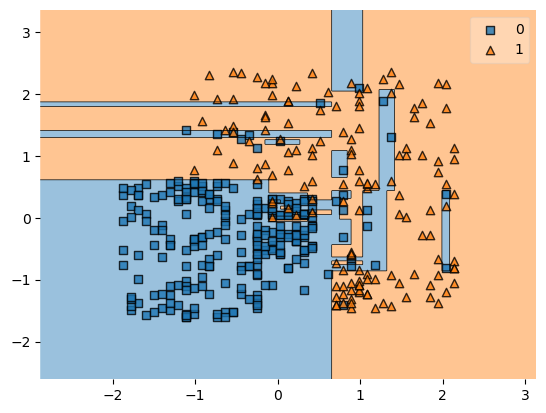

In [19]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)

In [20]:
from sklearn.tree import plot_tree

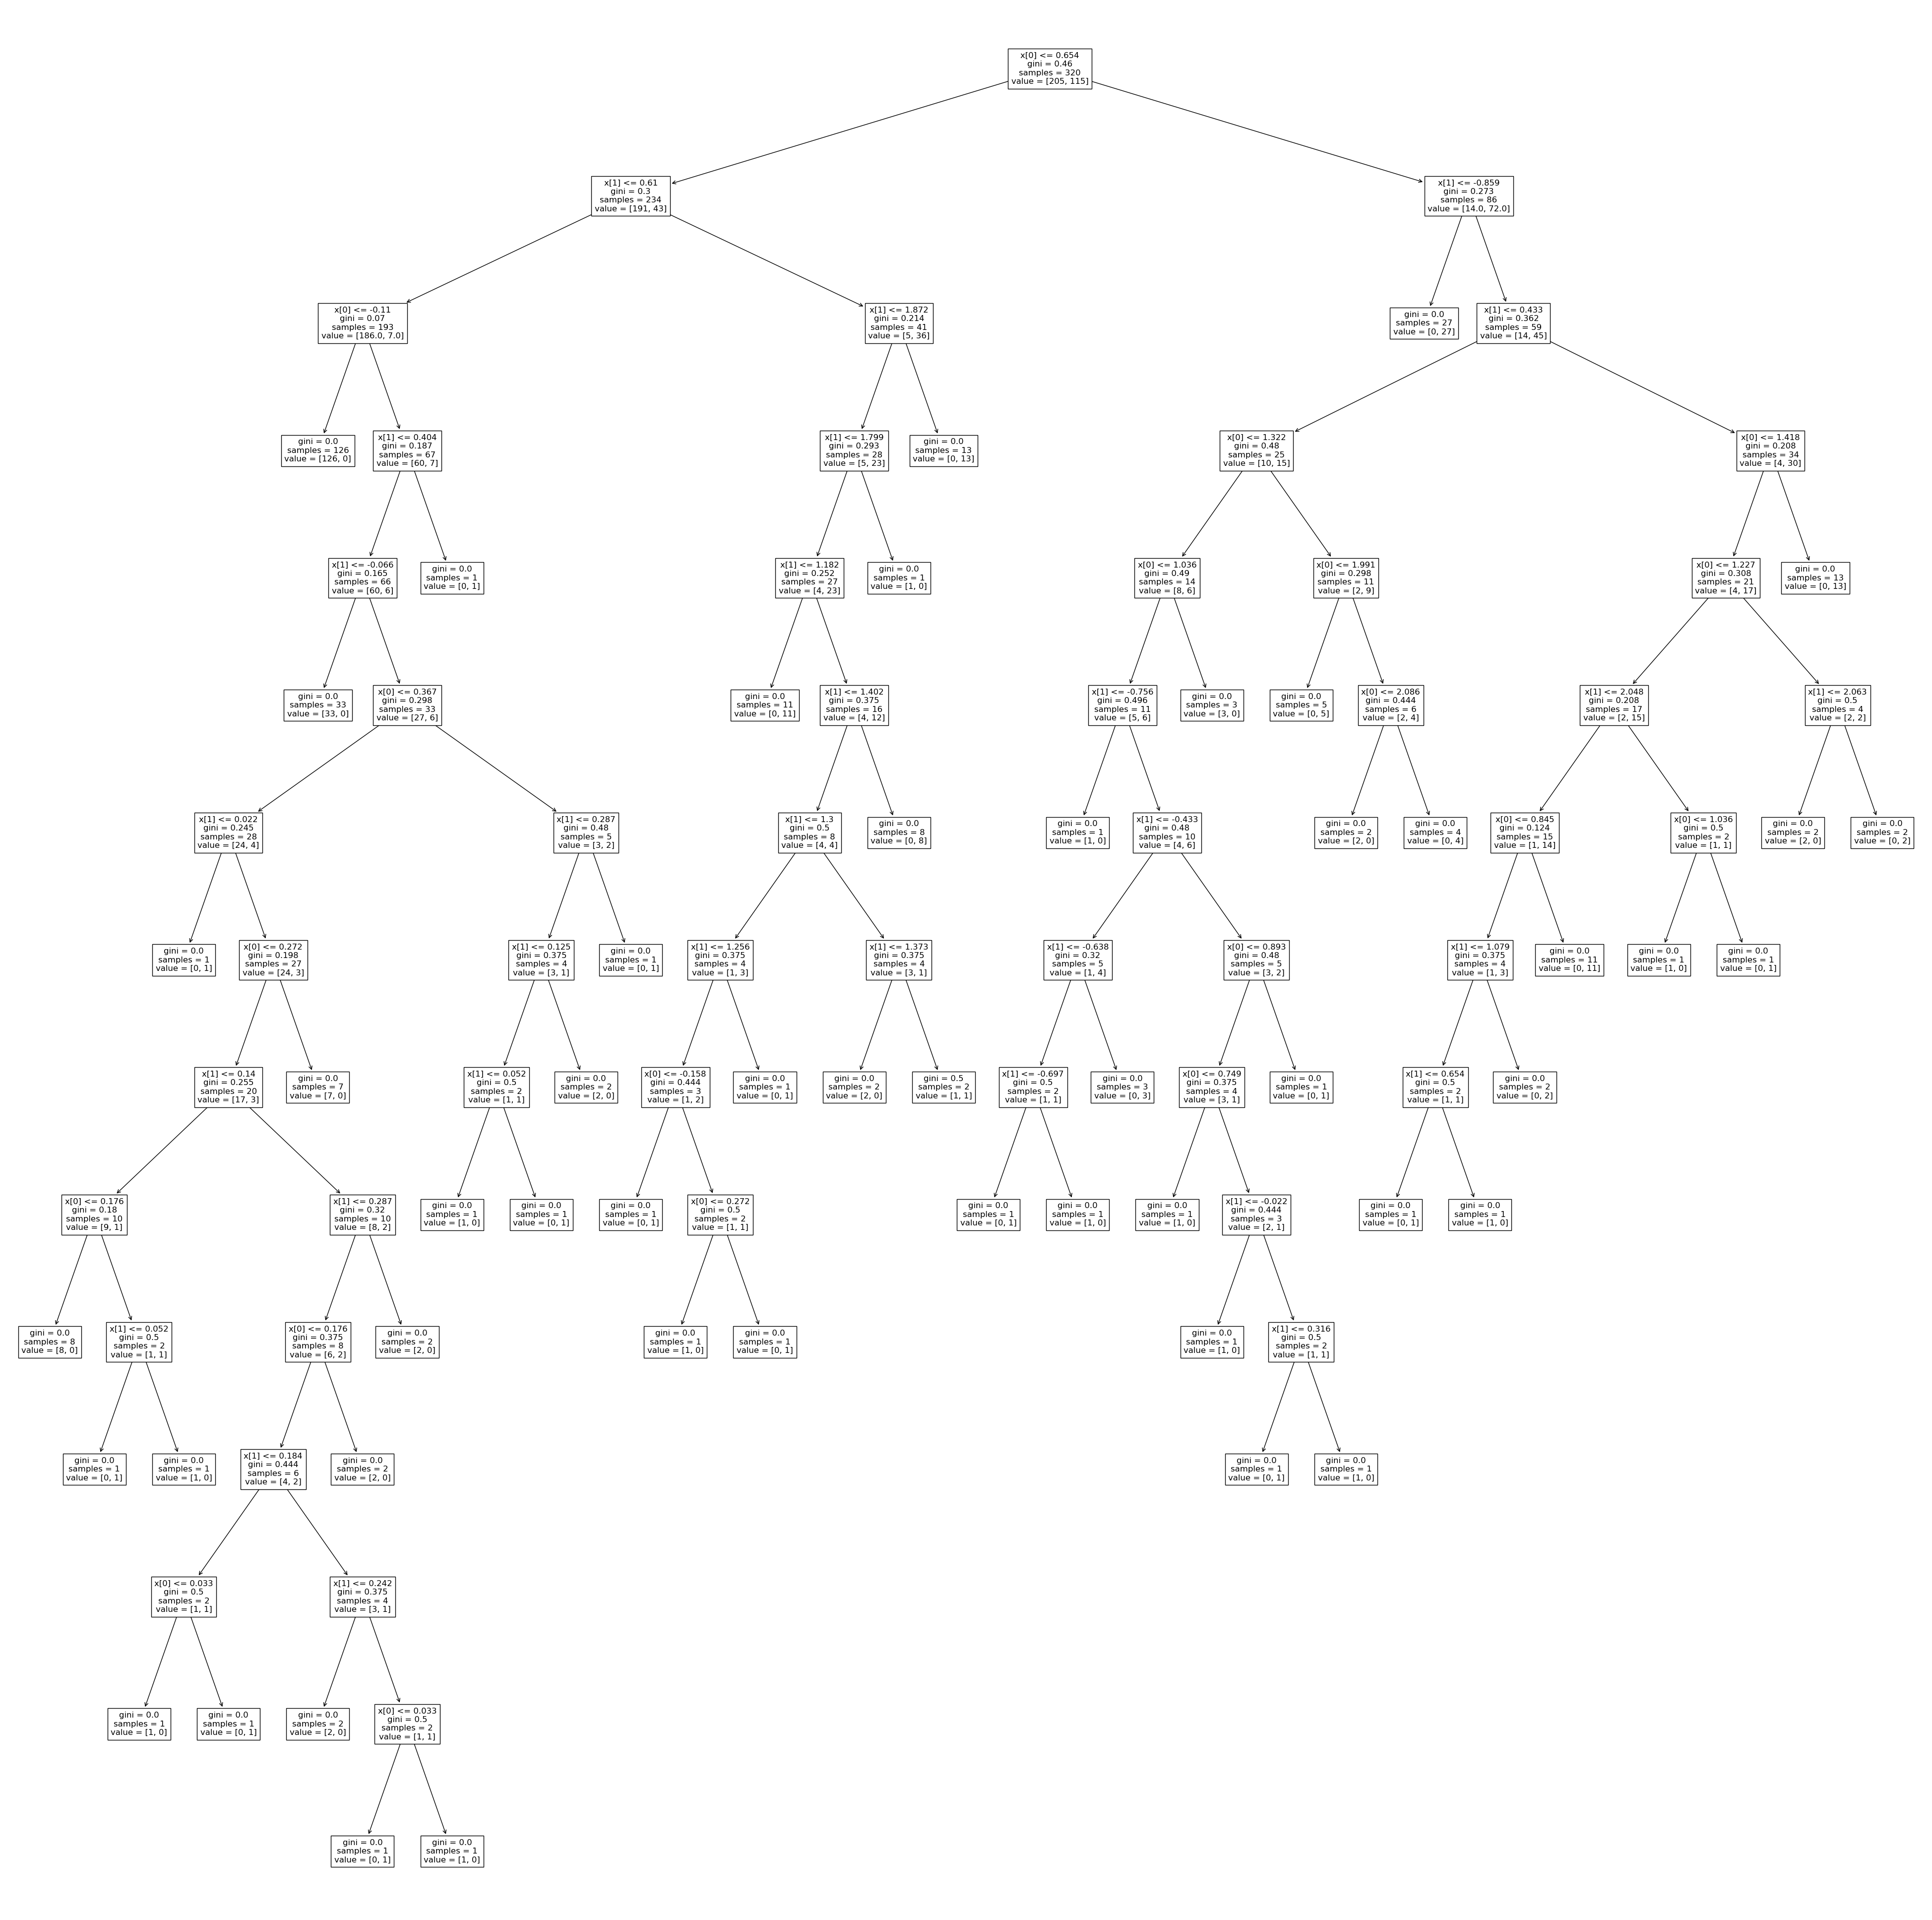

In [21]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("tree.jpg")
plt.show()

Model is overfitted perfrom well on training data but give poor resluts on test data

In [41]:
# Score on training data
train_score = dt.score(x_train, y_train)*100
    
    # Score on test data
test_score = dt.score(x_test, y_test)*100
    
print(f" Training Accuracy: {train_score}, Test Accuracy: {test_score}")

 Training Accuracy: 99.6875, Test Accuracy: 83.75


pre prunning 

In [31]:
dt3=DecisionTreeClassifier(max_depth=3)
dt3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [38]:
# Score on training data
train_score = dt3.score(x_train, y_train)*100
    
    # Score on test data
test_score = dt3.score(x_test, y_test)*100
    
print(f" Training Accuracy: {train_score}, Test Accuracy: {test_score}")


 Training Accuracy: 91.875, Test Accuracy: 91.25


After prunning accuracy increase 

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

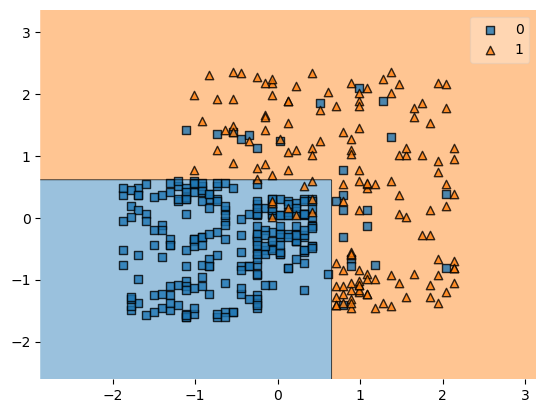

In [34]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt3)

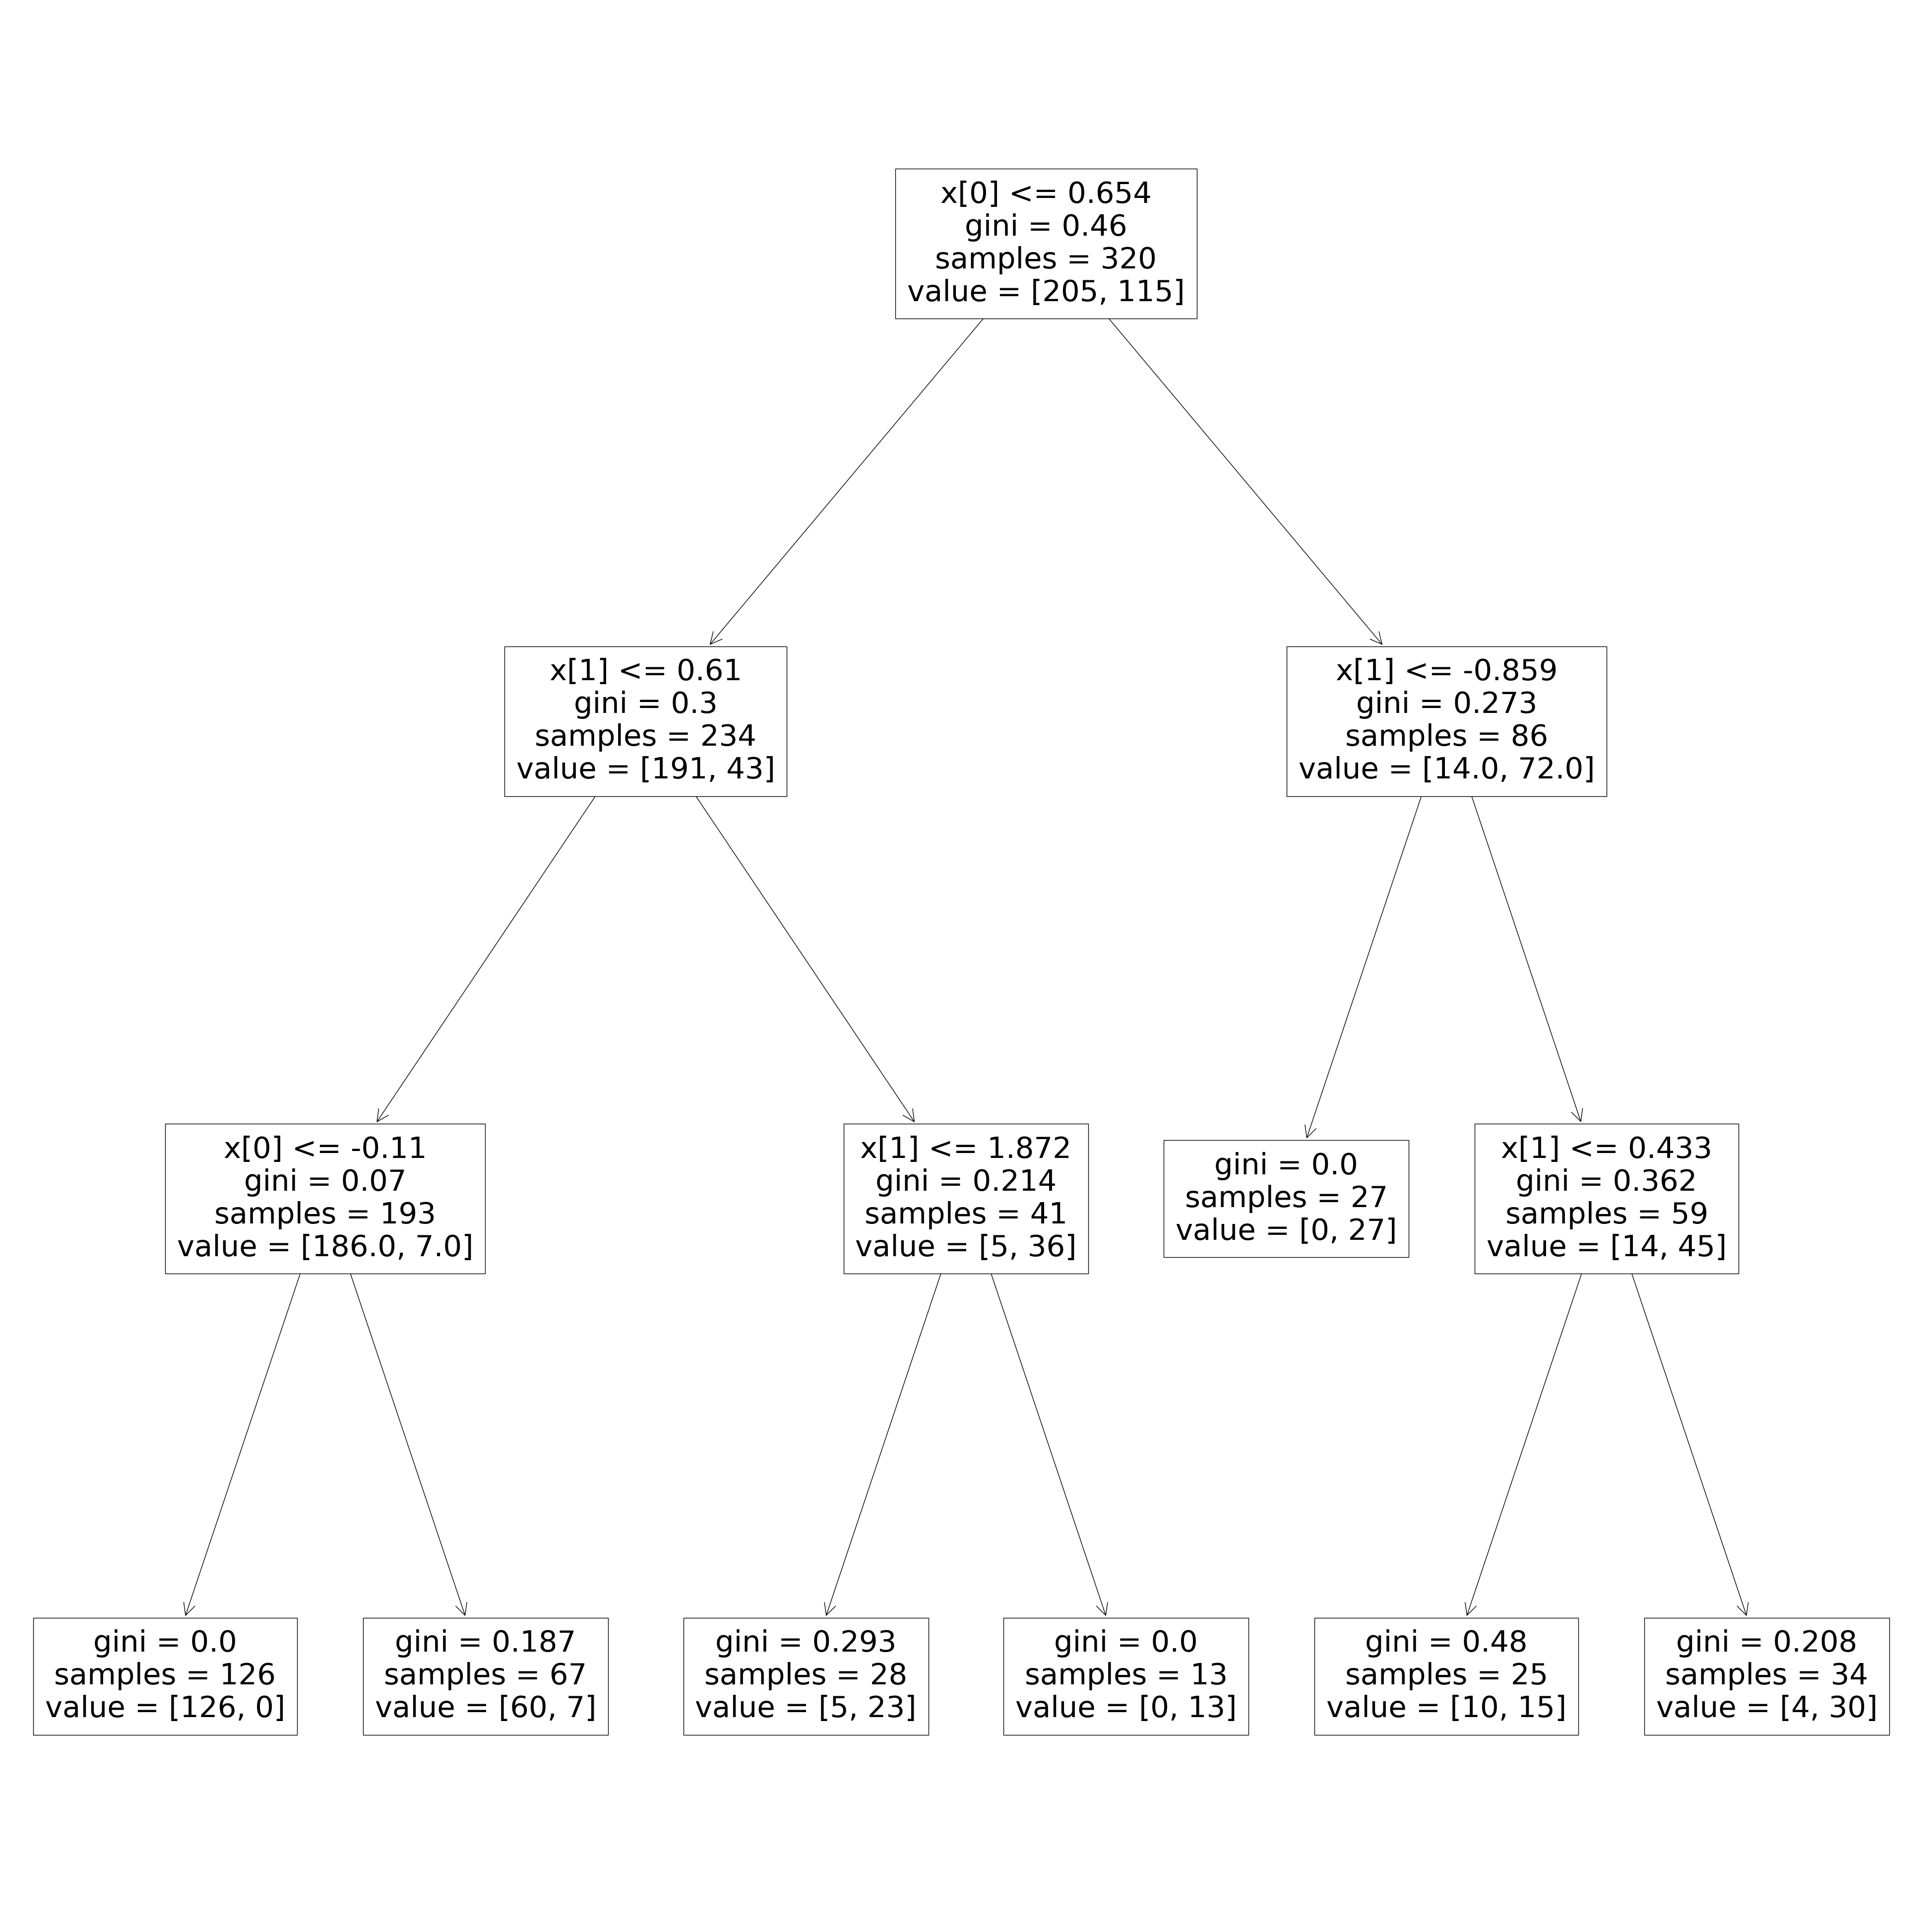

In [43]:
plt.figure(figsize=(50,50))
plot_tree(dt3)
plt.savefig("tree.jpg")
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier

Post prunning

In [42]:
for i in range(1, 20):
    dt4 = DecisionTreeClassifier(max_depth=i)
    dt4.fit(x_train, y_train)
    
    # Score on training data
    train_score = dt4.score(x_train, y_train)*100
    
    # Score on test data
    test_score = dt4.score(x_test, y_test)*100
    
    print(f"Max Depth: {i}, Training Accuracy: {train_score}, Test Accuracy: {test_score}")


Max Depth: 1, Training Accuracy: 82.1875, Test Accuracy: 90.0
Max Depth: 2, Training Accuracy: 91.875, Test Accuracy: 91.25
Max Depth: 3, Training Accuracy: 91.875, Test Accuracy: 91.25
Max Depth: 4, Training Accuracy: 93.125, Test Accuracy: 91.25
Max Depth: 5, Training Accuracy: 93.4375, Test Accuracy: 90.0
Max Depth: 6, Training Accuracy: 95.0, Test Accuracy: 86.25
Max Depth: 7, Training Accuracy: 96.875, Test Accuracy: 85.0
Max Depth: 8, Training Accuracy: 97.1875, Test Accuracy: 85.0
Max Depth: 9, Training Accuracy: 98.125, Test Accuracy: 85.0
Max Depth: 10, Training Accuracy: 98.4375, Test Accuracy: 85.0
Max Depth: 11, Training Accuracy: 99.0625, Test Accuracy: 83.75
Max Depth: 12, Training Accuracy: 99.0625, Test Accuracy: 83.75
Max Depth: 13, Training Accuracy: 99.6875, Test Accuracy: 83.75
Max Depth: 14, Training Accuracy: 99.6875, Test Accuracy: 83.75
Max Depth: 15, Training Accuracy: 99.6875, Test Accuracy: 83.75
Max Depth: 16, Training Accuracy: 99.6875, Test Accuracy: 83.75

Max Depth 2 or 3 are best for preprunning